<a href="https://colab.research.google.com/github/Msdot001/Betty/blob/master/NLP_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to Natural Language Processing (NLP)

This field concerned with the ability the ability of a computer to undersand, analyze, manipulate, potentially generate human language such as English, Spanish, Yoruba, Igbo or Arabic.

In other word, computer on its own does not understand what human language means, rather it see them as a strings, but with the help of Natural Language Processing, Computer can be made to understand this words.

Application of NLP in real life varies in wide ranges such as Spam Filter,Auto-complete in search engineer such as google, Auto-Correct on phone such as iphone.

NLP Encompasses many topics such as :
  - Sentiment analysis
  - Topic modeling
  - Text classification
  - Sentence segmentation or part-of-speech tagging
  


#### The Natural Language Toolkit

The Natural Language Toolkit, or more commonly NLTK, is a suite of libraries and programs for symbolic and statistical natural language processing for English written in the Python programming language. It supports classification, tokenization, stemming, tagging, parsing, and semantic reasoning functionalities.

In [ ]:
# Install NLTK
!pip install -U nltk


#### NLP Basic: Reading in text data

Read in semi-structured text data

#### Option 1: Reading file

In [ ]:
# Read in the raw text
rawData = open("/SMSSpamCollection.tsv").read()

# Print the raw data
rawData[0:500]

"ham\tI've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.\nspam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\nham\tNah I don't think he goes to usf, he lives around here though\nham\tEven my brother is not like to speak with me. They treat me like aid"

####  Clean the text

In [ ]:

# The main ideal is seprated each sentence into a list. Each sentence is beginings with "\n".
# The first step is to replaced each \t with \n, then split anytime you see \n

parsedData = rawData.replace("\t", "\n").split("\n")

In [ ]:
parsedData[0:10]

['ham',
 "I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.",
 'spam',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham',
 "Nah I don't think he goes to usf, he lives around here though",
 'ham',
 'Even my brother is not like to speak with me. They treat me like aids patent.',
 'ham',
 'I HAVE A DATE ON SUNDAY WITH WILL!!']

#### Extract the label data and text data

In [ ]:
# Extract the label data  and text data from the whole data

labelList = parsedData[0::2]      # fetch the label list
textList = parsedData[1::2]       # fetch the text list

In [ ]:
print(labelList[0:5])
print(textList[0:5])

['ham', 'spam', 'ham', 'ham', 'ham']
["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.", "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", "Nah I don't think he goes to usf, he lives around here though", 'Even my brother is not like to speak with me. They treat me like aids patent.', 'I HAVE A DATE ON SUNDAY WITH WILL!!']


In [ ]:
# Import pandas library
import pandas as pd

fullCorpus = pd.DataFrame({
    'label': labelList,
    'body_list': textList
})

fullCorpus.head()

ValueError: All arrays must be of the same length

In [ ]:
# To troubleshoot the error above: Check the length of the array

print(len(labelList))
print(len(textList))

5571
5570


In [ ]:
# check the last 5 labelList
print(labelList[-5:])

['ham', 'ham', 'ham', 'ham', '']


In [ ]:
# Drop the last emnpty string in the labelList

# Import pandas library
import pandas as pd

fullCorpus = pd.DataFrame({
    'label': labelList[:-1],    # copy everything expect the last string in the list to remove the empty string
    'body_list': textList
})

fullCorpus.head()

,label,body_list
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


#### Option 2: Reading File

Since the file is tap (\t) delimited. You can read the file using pandas.


In [ ]:
fullCorpus = pd.read_csv("/SMSSpamCollection.tsv", sep= "\t", header=None)
fullCorpus.head()

,0,1
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [ ]:
# Rename the header
fullCorpus.columns = ["labels", "body_text"]
fullCorpus.head()

,labels,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


#### Explore the dataset

In [ ]:
# What is the shape of the dataset

print("Input data has {} rows and {} columns".format(len(fullCorpus), len(fullCorpus.columns)))

Input data has 5568 rows and 2 columns


In [ ]:
# How many spam/ham are there? (the ration of label assist to determine the machine learning model to use)

print("Out of {} rows, {} are spam, {} are ham".format(len(fullCorpus),
                                                       len(fullCorpus[fullCorpus["labels"]=="spam"]),
                                                       len(fullCorpus[fullCorpus["labels"]=="ham"])))

Out of 5568 rows, 746 are spam, 4822 are ham


In [ ]:
# How much missing data is there

print("Number of null in label: {}".format(fullCorpus["labels"].isnull().sum()))
print("Number of null in text: {}".format(fullCorpus["body_text"].isnull().sum()))

Number of null in label: 0
Number of null in text: 0


#### **Regular Expression**

Text strings for describing a search pattern

reg"nlp" will return the "nlp" in a sentence

reg "[j-q]" will return the every string between j and q that are present in the sentence. It will each of the string as a single character.

reg "[j-q]+" similar like above, but have the capacity to return the multiple string unlike the above.

reg "[0-9]+" return sequence of number.

reg "[j-q0-9]+" return sequence of sting between j and q and number between 0 and 9.


##### **Uses Case of Regex**

- Confirming passwords meet criteria
- Searching URL for some substring
- Searching for files on your computer
- Document scraping

##### **Why Regex in NLP**

The primary purpose of using regex in NLP is to split sentences to a list of words, **tokenization of the sentence**, so python can understand what it might be looking at.



In [ ]:
#Import regex library
import re

re_test = "This is a made up string to test 2 different regex methods"

re_test_messy = "This      is a made up         string to test 2      different regex methods"
re_test_messy1 = 'This-is-a-made/up.string*to>>>>>>test-----2""""""different-regex-methods'


##### **1. Splitting a sentence into a list of words**

#### **Option 1: Apply split ()**
This find the non word such as white space and special character to split the sentence.



In [ ]:
# Option 1: Apply split method

re.split('\s', re_test)    # split the variable(re_test) by using a single widespace ("\s")

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [ ]:
re.split('\s', re_test_messy)    #The split is not neat,because python is looking for just single widespace wherease they are more widesapce


['This',
 '',
 '',
 '',
 '',
 '',
 'is',
 'a',
 'made',
 'up',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'string',
 'to',
 'test',
 '2',
 '',
 '',
 '',
 '',
 '',
 'different',
 'regex',
 'methods']

In [ ]:
# Same codes as above just that the python is looking for one or more widesapce because of the "\s+"
re.split('\s+', re_test_messy)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [ ]:
# Sentence contian special character seperating the words
re.split('\s+', re_test_messy1)

['This-is-a-made/up.string*to>>>>>>test-----2""""""different-regex-methods']

In [ ]:
# Same code as above but instead of "\s+" which look for widespace alone, use "\W+" ,meaning split by one or more non word character
re.split('\W+', re_test_messy1)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

#### **Option 2: Using Findall()**

This is involve search for the actual words themselve instead for what split the words and ignore special character

In [ ]:
# Using find().
# using capital \S+ look for one or more non white space character unlike small \s+ which look for one or more white space chaeater

# on re_test variable
re.findall('\S+', re_test)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [ ]:
# on re_test_messy  variable

re.findall('\S+', re_test_messy)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [ ]:
# on re_test_messy1  variable

re.findall('\S+', re_test_messy1)

['This-is-a-made/up.string*to>>>>>>test-----2""""""different-regex-methods']

In [ ]:
# on re_test_messy1 variable( which contain white space and other special character)
# Recall \W+ looks for one or more non-word charaters, whereas \w+ look for one or more word character

re.findall('\w+', re_test_messy1)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

##### **2. Replacing a specific string**

In [ ]:
pep8_test = 'I try to follow PEP8 guidelines'
pep7_test = 'I try to follow PEP7 guidelines'
peep8_test = 'I try to follow PEEP8 guidelines'


In [ ]:
# find every PEP8

import re

re.findall("[a-z]+", pep8_test)    # only return the small letter with number

['try', 'to', 'follow', 'guidelines']

In [ ]:
re.findall("[A-Z]+", pep8_test)    # Only return the capital letter


['I', 'PEP']

In [ ]:
re.findall("[A-Z0-9]+", pep8_test)

['I', 'PEP8']

In [ ]:
#pep8_test
re.findall("[A-Z]+[0-9]+", pep8_test)

['PEP8']

In [ ]:
#pep7_test
re.findall("[A-Z]+[0-9]+", pep7_test)

['PEP7']

In [ ]:
#peep7_test
re.findall("[A-Z]+[0-9]+", peep8_test)

['PEEP8']

#### Search for a word and replace with another words using regex



In [ ]:
#pep8_test
re.sub("[A-Z]+[0-9]+", "PEP8 Python Styleguide", pep8_test)

'I try to follow PEP8 Python Styleguide guidelines'

In [ ]:
#pep7_test
re.sub("[A-Z]+[0-9]+", "PEP8 Python Styleguide", pep7_test)

'I try to follow PEP8 Python Styleguide guidelines'

In [ ]:
#peep8_test
re.sub("[A-Z]+[0-9]+", "PEP8 Python Styleguide", peep8_test)

'I try to follow PEP8 Python Styleguide guidelines'

####  Other examples of regex mehods

- re.search()
-re.match()
-re.fullmatch()
-re.finditer()
-re.secape90

## **Implementing  a pipeline to clean text**

**Pre-processing text data**

Cleaning up the text is necessar to hightlight attributes that you're going to want your machine learning system to pick up on. Pre-processing the data typically consist of a number of steps:
  1. Remove of punctuation
  2. Tokenization
  3. Remove stopwords
  4. Lemmatize/Stem

The first three steps are covered are implemented in almost all the text cleaning pipeline. Lemmatizing and stemming are helpful but not critical

#### **1. Data Importation**

In [ ]:
# Load the data using the dataframe

# Import library
import pandas as pd

# Set the maximum column length to display
pd.set_option('display.max_colwidth', 100)

data = pd.read_csv("/SMSSpamCollection.tsv", sep='\t', header=None)
data.columns= ['label', 'body_text']

data.head()


,label,body_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


#### **2. Remove punctuation**

In [ ]:
# import library
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punct(text):
  text_nopunct = ''.join([char for char in text if char not in string.punctuation])
  return text_nopunct

# create a new column and apply the function above n the body_text column
data['body_text_clean'] = data['body_text'].apply(lambda x: remove_punct(x))

data.head()

,label,body_text,body_text_clean
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL


#### **3. Tokenization**

Splitting sentences to a list of words

In [ ]:
# Import library
import re

# define the function
def tokenize(text):
  tokens = re.split('\W+', text)
  return tokens

# apply function using lamba
data['body_text_tokenized'] = data['body_text_clean'].apply(lambda x: tokenize(x.lower()))

data.head()

,label,body_text,body_text_clean,body_text_tokenized
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]"


#### **4. Remove stopwords**

In [ ]:
# Import library
import nltk
nltk.download('stopwords')

stopword = nltk.corpus.stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def remove_stopwords(tokenized_list):
  text = [word for word in tokenized_list if word not in stopword]
  return text

data['body_text_nostop'] = data['body_text_tokenized'].apply(lambda x: remove_stopwords(x))

data.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ...","[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]"


#### **5. Stemming**

This process of reducing inflected (or derived) words  to their word stem or root. This mean chopping off the end of the word to leave only the base.

**Benefit of Stemming**

- Reduces the corpus of words the models is exposed to
- Explicitly correlates words with similar meanings.

**Few types of Stemmers**
- Porter Stemmer (most popular)
- Snowball Stemmer
- Landcaster Stemmer
- Regex-Based Stemmer

##### **5.1 Testing out Porter stemmer**

In [ ]:
# import library
import nltk

ps = nltk.PorterStemmer()

In [ ]:
# View the function inside the package. (interest is the stem())
dir(ps)

['MARTIN_EXTENSIONS',
 'NLTK_EXTENSIONS',
 'ORIGINAL_ALGORITHM',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_apply_rule_list',
 '_contains_vowel',
 '_ends_cvc',
 '_ends_double_consonant',
 '_has_positive_measure',
 '_is_consonant',
 '_measure',
 '_replace_suffix',
 '_step1a',
 '_step1b',
 '_step1c',
 '_step2',
 '_step3',
 '_step4',
 '_step5a',
 '_step5b',
 'mode',
 'pool',
 'stem',
 'vowels']

In [ ]:
# Apply stem(), Example 1

print(ps.stem('grows'))
print(ps.stem('growing'))
print(ps.stem('grow'))

grow
grow
grow


In [ ]:
# Apply stem(),     Example 2

print(ps.stem('run'))
print(ps.stem('running'))
print(ps.stem('runner'))

run
run
runner


#### **Combined the above code together**

Import data and data clean (remove puntuation, Tokenization, remove stop words,

#### **Read Raw Data**



In [ ]:
# Import library
import pandas as pd
import re
import string
pd.set_option('display.max_colwidth', 100)

stopwords = nltk.corpus.stopwords.words('english')

data = pd.read_csv('/SMSSpamCollection.tsv', sep='\t')
data.columns= ['label', 'body_text']

data.head()

,label,body_text
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
1,ham,"Nah I don't think he goes to usf, he lives around here though"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...


#### **Clean Up Text**

In [ ]:
def clean_text(text):
  text = "".join([word for word in text if word not in string.punctuation])
  tokens = re.split("\W+", text)
  text = [word for word in tokens if word not in stopwords]
  return text

data["body_text_nostop"] = data['body_text'].apply(lambda x: clean_text(x.lower()))

data.head()

,label,body_text,body_text_nostop
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
1,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aids, patent]"
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]"
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,"[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, callers, pr..."


#### **Stem text**

In [ ]:
def stemming(tokenized_text):
  text = [ps.stem(word) for word in tokenized_text]
  return text

data['body_text_stemmed'] = data["body_text_nostop"].apply(lambda x: stemming(x))

data.head()


,label,body_text,body_text_nostop,body_text_stemmed
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,..."
1,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]"
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]","[date, sunday]"
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,"[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, callers, pr...","[per, request, mell, mell, oru, minnaminungint, nurungu, vettam, set, callertun, caller, press, ..."


#### **6. Lemmatizing**

This is the process of grouping together the infected forms of a wword so they can be analyzed as a single term, identified by the word's lemma.

##### **Different between Lemmatizing And Stemming**

**Stemming** is typically faster as it simply chops off the end of a word using heuristics, without any understanding of the context in which is used.

**Lemmatizing** is typically more accurate as it uses more informed analysis to create groups of words with similar meaning based on the contexxt around the word. It may be more computational expensive.


#### **6.1 Test out WordNet Lemmatizer**

In [ ]:
import nltk
nltk.download('wordnet')

wn = nltk.WordNetLemmatizer()     # Lemmatizer
ps = nltk.PorterStemmer()         # Stemmer


[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# call out the function inssid the package

dir(wn)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'lemmatize']

In [ ]:
# stemmer
print(ps.stem('meanness'))
print(ps.stem('meaning'))

mean
mean


In [ ]:
# stemmer
print(ps.stem('goose'))
print(ps.stem('geese'))

goos
gees


In [ ]:
# lemmitizer
print(wn.lemmatize('meanness'))
print(wn.lemmatize('meaning'))

meanness
meaning


In [ ]:
# lemmitizer
print(wn.lemmatize('goose'))
print(wn.lemmatize('geese'))

goose
goose


#### **Improved code with Lemmatizer and Stemmer**

#### **Read in raw text**

In [ ]:
nltk.download('all')
import pandas as pd
import re
import string
pd.set_option('display.max_colwidth', 100)
stopwords = nltk.corpus.stopwords.words('english')

In [ ]:

data = pd.read_csv('/SMSSpamCollection.tsv', sep='\t')
data.columns = ['label', 'body_text']

data.head()

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

,label,body_text
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
1,ham,"Nah I don't think he goes to usf, he lives around here though"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...


#### **Clean up text**

In [ ]:
def clean_text(text):
  text = "".join([word for word in text if word not in string.punctuation])
  tokens = re.split("\W+", text)
  text = [word for word in tokens if word not in stopwords]
  return text

data["body_text_nostop"] = data['body_text'].apply(lambda x: clean_text(x.lower()))

data.head()

,label,body_text,body_text_nostop
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
1,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aids, patent]"
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]"
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,"[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, callers, pr..."


#### **Lemmatize text**

In [ ]:
def lemmatizing(tokenized_text):
  text = [wn.lemmatize(word) for word in tokenized_text]
  return text


data["body_text_lemmatized"] = data["body_text_nostop"].apply(lambda x: lemmatizing(x))

data.head(10)

,label,body_text,body_text_nostop,body_text_lemmatized
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
1,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, go, usf, life, around, though]"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]"
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]","[date, sunday]"
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,"[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, callers, pr...","[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, caller, pre..."
5,spam,WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To c...,"[winner, valued, network, customer, selected, receivea, 900, prize, reward, claim, call, 0906170...","[winner, valued, network, customer, selected, receivea, 900, prize, reward, claim, call, 0906170..."
6,spam,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with came...,"[mobile, 11, months, u, r, entitled, update, latest, colour, mobiles, camera, free, call, mobile...","[mobile, 11, month, u, r, entitled, update, latest, colour, mobile, camera, free, call, mobile, ..."
7,ham,"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried ...","[im, gonna, home, soon, dont, want, talk, stuff, anymore, tonight, k, ive, cried, enough, today]","[im, gonna, home, soon, dont, want, talk, stuff, anymore, tonight, k, ive, cried, enough, today]"
8,spam,"SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, ...","[six, chances, win, cash, 100, 20000, pounds, txt, csh11, send, 87575, cost, 150pday, 6days, 16,...","[six, chance, win, cash, 100, 20000, pound, txt, csh11, send, 87575, cost, 150pday, 6days, 16, t..."
9,spam,"URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM...","[urgent, 1, week, free, membership, 100000, prize, jackpot, txt, word, claim, 81010, tc, wwwdbuk...","[urgent, 1, week, free, membership, 100000, prize, jackpot, txt, word, claim, 81010, tc, wwwdbuk..."


### **Vectorizing**

The process of encoding text as integers to create feature vector.

#### **Different Types of Vectorization**

  - Count vectorization
  - N-grams
  - Term frequency - Inverse document frequency (TF-IDF)


#### **Vectorizing Raw Data: Count Vectorization Approach**

Create a document term matrix where the entry of each cell will be a count of the number of times that word occurred in that document

1.   List item
2.   List item



#### **Improved code with Count Vectorization Approach**

#### **Read in raw text**

In [ ]:
import nltk
nltk.download('all')

import pandas as pd
import re
import string
pd.set_option('display.max_colwidth', 100)

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

In [ ]:
data = pd.read_csv('/SMSSpamCollection.tsv', sep='\t')
data.columns = ['label', 'body_text']

data.head()

,label,body_text
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
1,ham,"Nah I don't think he goes to usf, he lives around here though"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...


#### **Create function to remove puntuation, tokenize, remove stopwords and stem**

In [ ]:
def clean_text(text):
  text = "".join([word.lower() for word in text if word not in string.punctuation])
  tokens = re.split("\W+", text)
  text = [ps.stem(word) for word in tokens if word not in stopwords]
  return text

#### **Apply CountVectorizer**

In [ ]:
# Import library
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate the object and define the function above as parameter inside it.
count_vect = CountVectorizer(analyzer=clean_text)

# Fit and transform the the data
X_counts = count_vect.fit_transform(data['body_text'])

# Print the shape of the vectorize X data
print(X_counts.shape)    # e.g (5567, 8104) == the document contain 5567 text message and 8104 uniques word

# Print out all the umique words find inside the each of the text message in the data using "get_feature_name_out()"
print(count_vect.get_feature_names_out())



(5567, 8104)
['' '0' '008704050406' ... 'ü' 'üll' '〨ud']


#### **Apply CountVectorizer to smaller sample**



In [ ]:
data_sample = data[0:20]

count_vect_sample =CountVectorizer(analyzer=clean_text)
X_count_sample = count_vect_sample.fit_transform(data_sample["body_text"])
print(X_count_sample.shape)
print(count_vect_sample.get_feature_names_out())

(20, 192)
['08002986030' '08452810075over18' '09061701461' '1' '100' '100000' '11'
 '12' '150pday' '16' '2' '20000' '2005' '21st' '3' '4' '4403ldnw1a7rw18'
 '4txtú120' '6day' '81010' '87077' '87121' '87575' '9' '900' 'aft' 'aid'
 'alreadi' 'alright' 'anymor' 'appli' 'ard' 'around' 'b' 'brother' 'call'
 'caller' 'callertun' 'camera' 'cash' 'chanc' 'claim' 'click' 'co' 'code'
 'colour' 'comin' 'comp' 'copi' 'cost' 'credit' 'cri' 'csh11' 'cup'
 'custom' 'da' 'date' 'dont' 'eg' 'eh' 'england' 'enough' 'entitl' 'entri'
 'even' 'fa' 'feel' 'ffffffffff' 'final' 'fine' 'finish' 'first' 'free'
 'friend' 'go' 'goalsteam' 'goe' 'gonna' 'gota' 'ha' 'hl' 'home' 'hour'
 'httpwap' 'im' 'info' 'ive' 'jackpot' 'joke' 'k' 'kim' 'kl341' 'lar'
 'latest' 'lccltd' 'like' 'link' 'live' 'lor' 'lunch' 'macedonia' 'make'
 'may' 'meet' 'mell' 'membership' 'messag' 'minnaminungint' 'miss' 'mobil'
 'month' 'nah' 'name' 'nation' 'naughti' 'network' 'news' 'next' 'nurungu'
 'oh' 'oru' 'patent' 'pay' 'per' 'pobox' 'p

#### **Vectorizers output sparse matrices**

The raw data output of the count vectorizer is called **Sparse matrices.**

Sparse matrix is a form of matrix in which high percentage of the entries/element are zero, but instead storing the zero in the full matrix, **the location** of the **zero** is store along with the **values of** the **non-zero** elements.

This much more efficent for the storage.


In [ ]:
# Outpout of vectorized data save in sparse matrix
X_count_sample

<20x192 sparse matrix of type '<class 'numpy.int64'>'
	with 218 stored elements in Compressed Sparse Row format>

In [ ]:
# To expand the sparse matrix to full matrix, (that is to store both zero and non zeros elenment in the  matrix)
X_count_sample.toarray() # An array

# Convert the array to dataframe
X_counts_df = pd.DataFrame(X_count_sample.toarray())
X_counts_df

,0,1,2,3,4,5,6,7,8,9,...,182,183,184,185,186,187,188,189,190,191
0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
9,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [ ]:
# Replace the column with Unique name in the doucment instead of the column number.
X_counts_df.columns = count_vect_sample.get_feature_names_out()
X_counts_df

,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150pday,16,...,wet,win,winner,wkli,word,wwwdbuknet,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye,ü
0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
9,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


#### **Vectorizing Raw Data: N-Grams Approach**

### **N-Grams**

Creates a documennt-term matrix where counts still occupy the cell but instead of the columns representing a single terms, trhey represent all combinations of adjacent words of length n in your text.


#### **Read in raw text**

In [ ]:
import nltk
# nltk.download('all')

import pandas as pd
import re
import string
pd.set_option('display.max_colwidth', 100)

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

In [ ]:
data = pd.read_csv('/SMSSpamCollection.tsv', sep='\t')
data.columns = ['label', 'body_text']

data.head()

,label,body_text
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
1,ham,"Nah I don't think he goes to usf, he lives around here though"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...


#### **Create function to remove puntuation, tokenize, remove stopwords and stem**

There is a slight change in the step of cleaning the data. Unlike the **CountVectorization** that receive a **tokenized list** directly into count vectorizer function,as for **N-Gram vectorization** approach, it want a **string** passed into it, thus it require to join back the tokenized list to form a strings.

In [ ]:
def clean_text(text):
  text = "".join([word.lower() for word in text if word not in string.punctuation])
  tokens = re.split("\W+", text)
  # joining back the tokenized list to string
  text = " ".join([ps.stem(word) for word in tokens if word not in stopwords])
  return text

data["cleanned_text"] = data["body_text"].apply(lambda x: clean_text(x))
data.head()

,label,body_text,cleanned_text
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd...
1,ham,"Nah I don't think he goes to usf, he lives around here though",nah dont think goe usf live around though
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,even brother like speak treat like aid patent
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,date sunday
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,per request mell mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend...


#### **Apply CountVectorizer (using N-Grams)**

N-Grams will still use CountVectorizer because it will still count the group of words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate the objetcs
# Under N-Grams, we are not goining to use the analyzer, since we are not passing the clean_text function
# Instead, we are goinhg to state the "ngram_range" (1,1 implies only unigrams, 1,2 implies search for unigrams and bigrams, while 1,3 implies search for unigrams,bigrams and trigrams)

ngram_vect = CountVectorizer(ngram_range=(2,2))    # only interested in bigrams alone
X_counts = ngram_vect.fit_transform(data['cleanned_text'])
print(X_counts.shape)  # (5567, 31260) implies we have 5567 text/ rows with 3120 unique combinations of two words (unlike 8100 word in CountVectorizer)
print(ngram_vect.get_feature_names_out())



(5567, 31260)
['008704050406 sp' '0089mi last' '0121 2025050' ... 'üll submit'
 'üll take' '〨ud even']


#### **Apply CountVectorizer (with N-Gram) to smaller sample**



In [ ]:
data_sample = data[0:20]

ngram_vect_sample = CountVectorizer(ngram_range=(2,2))  # its something worth try to see different range of ngram
X_counts_sample = ngram_vect_sample.fit_transform(data_sample["cleanned_text"])
print(X_counts_sample.shape)
print(ngram_vect_sample.get_feature_names_out())

(20, 198)
['09061701461 claim' '100 20000' '100000 prize' '11 month' '12 hour'
 '150pday 6day' '16 tsandc' '20000 pound' '2005 text' '21st may'
 '4txtú120 poboxox36504w45wq' '6day 16' '81010 tc' '87077 eg'
 '87077 trywal' '87121 receiv' '87575 cost' '900 prize' 'aft finish'
 'aid patent' 'alright way' 'anymor tonight' 'appli 08452810075over18'
 'appli repli' 'ard smth' 'around though' 'brother like'
 'call 09061701461' 'call mobil' 'caller press' 'callertun caller'
 'camera free' 'cash 100' 'chanc win' 'claim 81010' 'claim call'
 'claim code' 'click httpwap' 'click wap' 'co free' 'code kl341'
 'colour mobil' 'comp win' 'copi friend' 'cost 150pday' 'credit click'
 'cri enough' 'csh11 send' 'cup final' 'custom select' 'da stock'
 'date sunday' 'dont miss' 'dont think' 'dont want' 'eg england'
 'eh rememb' 'england 87077' 'england macedonia' 'enough today'
 'entitl updat' 'entri questionstd' 'entri wkli' 'even brother' 'fa 87121'
 'fa cup' 'feel way' 'ffffffffff alright' 'final tkt' 'fine

#### **Vectorizers Output Sparse Matrice**

In [ ]:
X_counts_sample

<20x198 sparse matrix of type '<class 'numpy.int64'>'
	with 199 stored elements in Compressed Sparse Row format>

In [ ]:
# Convert to arrary and the dataframe

X_count_df = pd.DataFrame(X_counts_sample.toarray())
X_count_df.columns = ngram_vect_sample.get_feature_names_out()
X_count_df.head

,09061701461 claim,100 20000,100000 prize,11 month,12 hour,150pday 6day,16 tsandc,20000 pound,2005 text,21st may,...,way meet,week free,win cash,win fa,winner valu,wkli comp,word claim,wwwdbuknet lccltd,xxxmobilemovieclub use,ye naughti
0,0,0,0,0,0,0,0,0,1,1,...,0,0,0,1,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### **Vectorizing Raw Data:** **TF -IDF Equation Approach**

It represent the relevance of a term to a document or a corpus of documents. It works by assigning weights to words based on their frequency and rarity.The TF-IDF algorithm takes into account two main factors:

- The frequency of a word in a document (TF) and
- The frequency of the word across all documents in the corpus (IDF).

```
                      TF-IDF = TF * log(N/DF)
```

Where:

- TF is the term frequency of a word in a document
-N is the total number of documents in the corpus
- DF is the document frequency of a word in the corpus (i.e., the number of documents that contain the word)

#### **Read in raw text**

In [ ]:
import nltk
# nltk.download('all')

import pandas as pd
import re
import string
pd.set_option('display.max_colwidth', 100)

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

In [ ]:
data = pd.read_csv('/SMSSpamCollection.tsv', sep='\t')
data.columns = ['label', 'body_text']

data.head()

,label,body_text
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
1,ham,"Nah I don't think he goes to usf, he lives around here though"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...


#### **Create function to remove puntuation, tokenize, remove stopwords and stem**

The data clean approach is simoilar  **CountVectorization** that receive a **tokenized list** directly into count vectorizer function.

In [ ]:
def clean_text(text):
  text = "".join([word.lower() for word in text if word not in string.punctuation])
  tokens = re.split("\W+", text)
  text = [ps.stem(word) for word in tokens if word not in stopwords]
  return text


#### **Apply TfidfVectorizer**

In [ ]:
#Import library

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data["body_text"])
print(X_tfidf.shape)
print(tfidf_vect.get_feature_names_out())

(5567, 8104)
['' '0' '008704050406' ... 'ü' 'üll' '〨ud']


#### **Apply TfidVectorizer to Small Sample**

---



In [ ]:
data_sample = data[0:20]

tfidf_vect_sample = TfidfVectorizer(analyzer=clean_text)
X_tfidf_sample = tfidf_vect_sample.fit_transform(data_sample["body_text"])

print(X_tfidf_sample.shape)
print(tfidf_vect_sample.get_feature_names_out())


(20, 192)
['08002986030' '08452810075over18' '09061701461' '1' '100' '100000' '11'
 '12' '150pday' '16' '2' '20000' '2005' '21st' '3' '4' '4403ldnw1a7rw18'
 '4txtú120' '6day' '81010' '87077' '87121' '87575' '9' '900' 'aft' 'aid'
 'alreadi' 'alright' 'anymor' 'appli' 'ard' 'around' 'b' 'brother' 'call'
 'caller' 'callertun' 'camera' 'cash' 'chanc' 'claim' 'click' 'co' 'code'
 'colour' 'comin' 'comp' 'copi' 'cost' 'credit' 'cri' 'csh11' 'cup'
 'custom' 'da' 'date' 'dont' 'eg' 'eh' 'england' 'enough' 'entitl' 'entri'
 'even' 'fa' 'feel' 'ffffffffff' 'final' 'fine' 'finish' 'first' 'free'
 'friend' 'go' 'goalsteam' 'goe' 'gonna' 'gota' 'ha' 'hl' 'home' 'hour'
 'httpwap' 'im' 'info' 'ive' 'jackpot' 'joke' 'k' 'kim' 'kl341' 'lar'
 'latest' 'lccltd' 'like' 'link' 'live' 'lor' 'lunch' 'macedonia' 'make'
 'may' 'meet' 'mell' 'membership' 'messag' 'minnaminungint' 'miss' 'mobil'
 'month' 'nah' 'name' 'nation' 'naughti' 'network' 'news' 'next' 'nurungu'
 'oh' 'oru' 'patent' 'pay' 'per' 'pobox' 'p

#### **Vectorizers Output Sparse Matrices**

In [ ]:
X_tfidf_df = pd.DataFrame(X_tfidf_sample.toarray())
X_tfidf_df.columns = tfidf_vect_sample.get_feature_names_out()
X_tfidf_df.head()

,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150pday,16,...,wet,win,winner,wkli,word,wwwdbuknet,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye,ü
0,0.0,0.198986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.174912,0.0,0.198986,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


### **Feature Engineering**

Creating new features or transforming your exiating features to get the most of the given data.


#### **Feature Creation**

Involve creating additional information that might be helpful for the model to make rightful prediction. Example incliude

- Did the text message length can be useful in predicting spam or non-spam
- Did percentage of text that is punctuate be used to predict spam or non-spam

#### **Read in raw text**

In [ ]:
import pandas as pd

data = pd.read_csv("/content/SMSSpamCollection.tsv", sep="\t")
data.columns = ["label", "body_text"]

data.head()

,label,body_text
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...
1,ham,"Nah I don't think he goes to usf, he lives aro..."
2,ham,Even my brother is not like to speak with me. ...
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnamin...


#### **1. Create feature for text message length**

Hypothesis:
- Spam message have a longer length than non-spam message
- Non-spam messgae have shorter length compare to spam message.



In [ ]:
# Subtract the count of white space from the total sentence to get the actual length of the words in the sentence

data["body_len"] = data["body_text"].apply(lambda x: len(x) - x.count(" "))
data.head()

,label,body_text,body_len
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128
1,ham,"Nah I don't think he goes to usf, he lives aro...",49
2,ham,Even my brother is not like to speak with me. ...,62
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28
4,ham,As per your request 'Melle Melle (Oru Minnamin...,135


#### **2. Create feature for % of text that is punctuation**

Hypothesis: Spam text have high percentage of punctuation compare to non-psma text.


In [ ]:
import string

def count_punct(text):
 count = sum([1 for char in text if char in string.punctuation])
 # return the sum of puntuation/ lenght of text in 3 decimal number
 return round(count/(len(text) - text.count(" ")), 3) * 100


data["punct%"] = data["body_text"].apply(lambda x : count_punct(x))


data.head()

,label,body_text,body_len,punct%
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
1,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
2,ham,Even my brother is not like to speak with me. ...,62,3.2
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1
4,ham,As per your request 'Melle Melle (Oru Minnamin...,135,4.4


#### **3. Thinks for other new feature you can create**

#### **Evaluate Create Feature**

After creating the two new features, it is essential to evaluate the correlate between the value of this features.

In [ ]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline


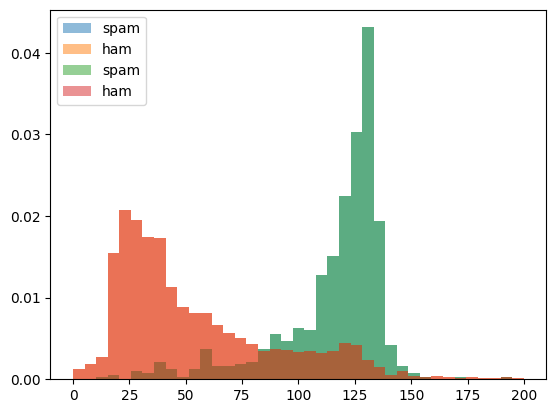

In [ ]:
#### **Histogram distribution of Length of words for Spam and Ham**

bins = np.linspace(0, 200, 40)
pyplot.hist(data[data["label"]=="spam"]["body_len"], bins, alpha=0.5, density=True, label="spam")
pyplot.hist(data[data["label"]=="ham"]["body_len"], bins, alpha=0.5, density=True, label="ham")
pyplot.legend(loc="upper left")
pyplot.show()

# From the histogram, the hypothesis that  spam seem to have high length of words then the non-spam, therefore this feature might be useful

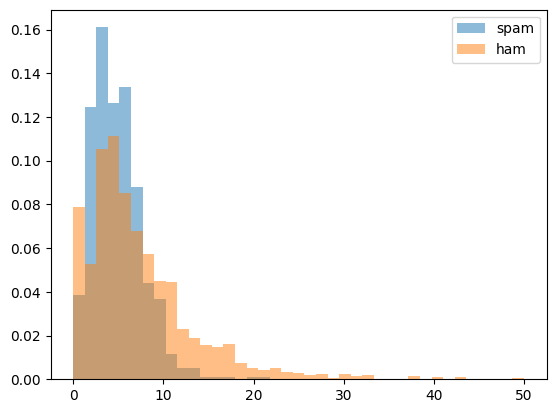

In [ ]:
#### **Histogram distribution of percentage of punctuation for Spam and Ham**

bins = np.linspace(0, 50, 40)
pyplot.hist(data[data["label"]=="spam"]["punct%"], bins, alpha=0.5, density=True, label="spam")
pyplot.hist(data[data["label"]=="ham"]["punct%"], bins, alpha=0.5, density=True, label="ham")
pyplot.legend(loc="upper right")
pyplot.show()

# From the histogram, the hypothesis that spam has high percentage of punctuation than non-spam seem not to be accuaray, hus its seem not to be useful to the model.

### **Feature Engineering: Transformations**


#### **Read in raw text**



In [ ]:
import pandas as pd

data = pd.read_csv("/content/SMSSpamCollection.tsv", sep="\t")
data.columns = ["label", "body_text"]

#### **Create the two new feature**


In [ ]:
import  string


def count_punct(text):
  count = sum([1 for char in text if char in string.punctuation])
  return round(count/(len(text) - text.count(" ")), 3)* 100

data["body_len"] = data["body_text"].apply(lambda x: len(x) - x.count(" "))
data["punct%"] = data["body_text"].apply(lambda x: count_punct(x))

data.head()

,label,body_text,body_len,punct%
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
1,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
2,ham,Even my brother is not like to speak with me. ...,62,3.2
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1
4,ham,As per your request 'Melle Melle (Oru Minnamin...,135,4.4


#### **Plot the two new features**


In [ ]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

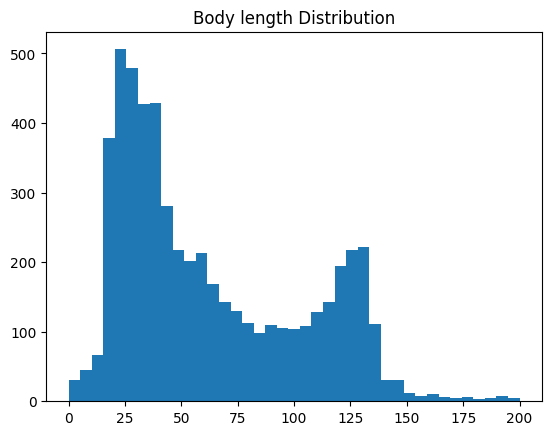

In [ ]:
#### **Histogram distribution of Length of words for Spam and Ham**

bins = np.linspace(0, 200, 40)

pyplot.hist(data["body_len"], bins)
pyplot.title("Body length Distribution")
pyplot.show()

# Nice distribution with two spike

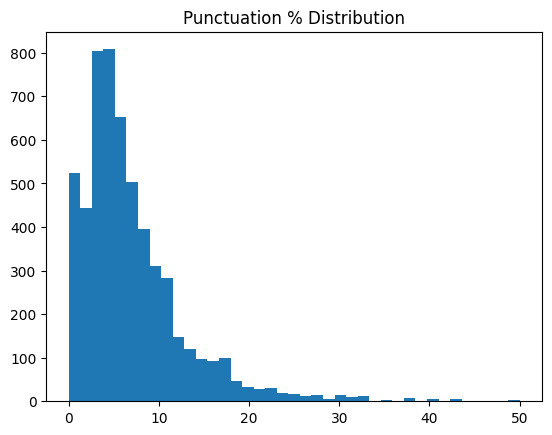

In [ ]:
bins = np.linspace(0, 50, 40)

pyplot.hist(data["punct%"], bins)
pyplot.title("Punctuation % Distribution")
pyplot.show()


#### **Transformation of the two new feature**

Transformation is the process that alter each data point in a certain columnin systematic ways.


**Box-Cow Power Transformations**

Process of Transformation

- Determine what range of exponent to test
- Apply eac transformation to each value of your chosen feature
- use some criteria to determiine which transformation yield the best distribution (*read more)


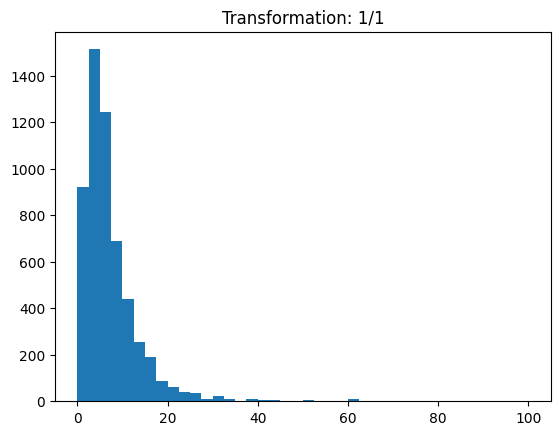

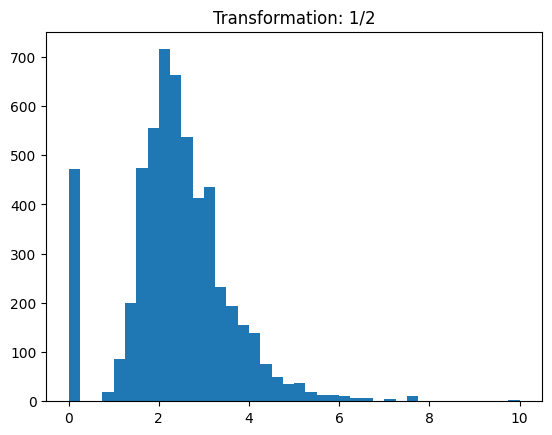

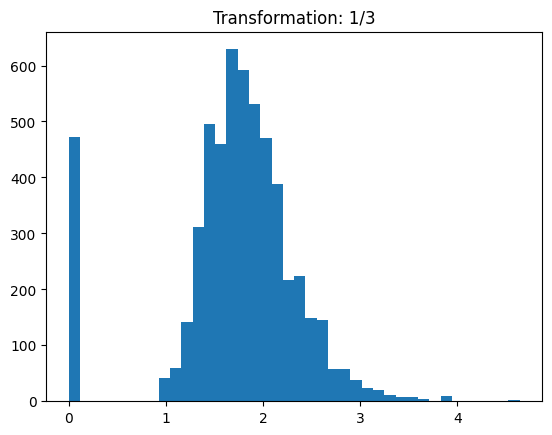

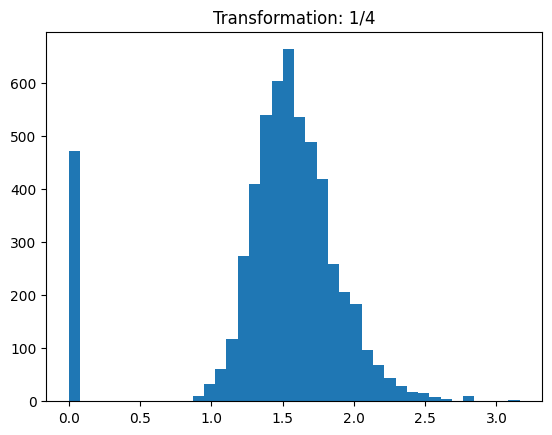

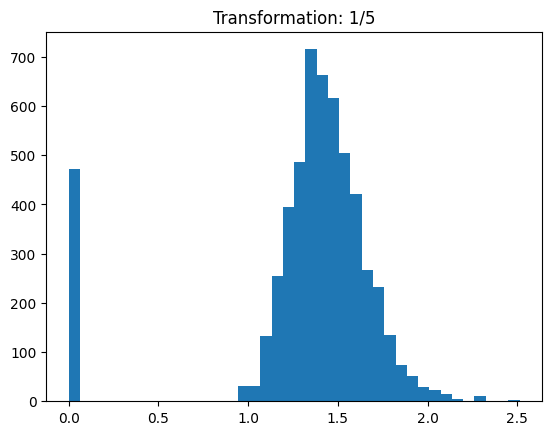

In [ ]:
# The ideal is to try different transformation using loop and use a criteria (histogram as one of the criteria) to determine the best transformation.

for i in [1, 2, 3, 4, 5]:
  pyplot.hist((data["punct%"])**(1/i), bins=40)
  pyplot.title("Transformation (y): 1/{}".format(str(i)))
  pyplot.show()

### **Machine Learning**

This is taining an algorithm on a set of known examples with a clear goal of generalizing to unseen example.

#### **Two Broad Type of Machine learning**

- Supervised Learning
- Unsupervised Learning


#### **Evaluation metrics**

- Accuracy = No predicted correctly / Total No of observation

- Precision= No predicted as spam that are actually spam/ Total No predicted as spam

- Recall = No predicted as spam that are actually spam / Total No that are actually spam.


#### **1. Ensemble Method**

This technique create multiple models and then combines them to produce better results than any of the single models individually.

#### **1.1 Random Forest**

This is form of Ensemble learing method that connstructs a collection of decision trees and then generates the predictions of each tree to determine the final prediction.

#### Benefits of Ensemble Method

- Can be used for classification or regression
- Easily handles outliers, missing values
- Accepts various types of inputs (continuous, ordinal)
- Less likely to overfit
- Outputs feature importance.

#### **Build Machine Learning Classifiers: Building a Bsic Random Foresst Model**

#### **Read in & clean text**

In [ ]:
import nltk
#nltk.download('all')

import pandas as pd
import re
from sklearn. feature_extraction.text import TfidfVectorizer
import string


stopwords = nltk.corpus.stopwords.words('english')
ps= nltk.PorterStemmer()

data = pd.read_csv("/content/SMSSpamCollection.tsv", sep="\t")
data.columns = ['label', 'body_text']


def count_punct(text):
  count = sum([1 for char in text if char in string.punctuation])
  return round(count/(len(text) - text.count(" ")), 3)*100

data["body_len"] = data["body_text"].apply(lambda x: len(x) - x.count(" "))
data["punct%"] = data["body_text"].apply(lambda x: count_punct(x))


def clean_text(text):
  text = "".join([word.lower() for word in text if word not in string.punctuation])
  tokens = re.split("\W+", text)
  text = [ps.stem(word) for word in tokens if word not in stopwords]
  return text

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data["body_text"])

# Add feature creation with the other features

X_features = pd.concat([data["body_len"], data["punct%"], pd.DataFrame(X_tfidf.toarray())], axis=1)
# convert all the feature names all to strings to avoid error when fiting the model
X_features.columns = X_features.columns.astype(str)
X_features.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,8094,8095,8096,8097,8098,8099,8100,8101,8102,8103
0,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,62,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28,7.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,135,4.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### **Explore RandomForestClassifier Attributes & Hyperparameter**



In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Show what RandomForestClassifier conatin and the default value for the hyperparameter

print(dir(RandomForestClassifier))
print(RandomForestClassifier())

# Feature_importances method(): This is what output the values of each feature to the model
# fit(): Allow you to fit your model
# n_jobs = -1 for any job that can be run in parall and make the process run faster.

# Hyperparameter
# max_depth=None (This define how deep individual decison tree is). max_depth=None meaqn nit built decision tree until it minimizes some of the loss criteria
# n-estimators = This is the number of decision trees that willo be built within the random forest.



['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_feature_names', '_check_n_features', '_compute_oob_predictions', '_estimator_type', '_get_oob_predictions', '_get_param_names', '_get_tags', '_make_estimator', '_more_tags', '_parameter_constraints', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_required_parameters', '_set_oob_score_and_attributes', '_validate_X_predict', '_validate_data', '_validate_estimator', '_validate_params', '_validate_y_class_weight', 'apply', 'base_estimator_', 'decision_path', 'feature_importances_', 'fit', 'get_params', 'predic

#### ** Option 1: Explore RandonmForestClassifier through Cross-Validation**



In [ ]:
# import library
from sklearn.model_selection import KFold, cross_val_score

# KFold facilitate the splitting of data into subsets while cross_val_score help to get the actual scoring.

In [ ]:
# Instantiate

rf = RandomForestClassifier(n_jobs=-1)
k_fold = KFold(n_splits=5)
cross_val_score(rf, X_features, data['label'], cv=k_fold, scoring='accuracy', n_jobs=-1)  # n_jobs=-1 allows the 5 fold to run parallel

array([0.97666068, 0.97755835, 0.97484277, 0.96495957, 0.97484277])

#### **Option 2: Explore RandonmForestClassifier c

#### **Read in & clean text**

In [ ]:
import nltk
#nltk.download('all')

import pandas as pd
import re
from sklearn. feature_extraction.text import TfidfVectorizer
import string


stopwords = nltk.corpus.stopwords.words('english')
ps= nltk.PorterStemmer()

data = pd.read_csv("/content/SMSSpamCollection.tsv", sep="\t")
data.columns = ['label', 'body_text']


def count_punct(text):
  count = sum([1 for char in text if char in string.punctuation])
  return round(count/(len(text) - text.count(" ")), 3)*100

data["body_len"] = data["body_text"].apply(lambda x: len(x) - x.count(" "))
data["punct%"] = data["body_text"].apply(lambda x: count_punct(x))


def clean_text(text):
  text = "".join([word.lower() for word in text if word not in string.punctuation])
  tokens = re.split("\W+", text)
  text = [ps.stem(word) for word in tokens if word not in stopwords]
  return text

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data["body_text"])

# Add feature creation with the other features

X_features = pd.concat([data["body_len"], data["punct%"], pd.DataFrame(X_tfidf.toarray())], axis=1)
# convert all the feature names all to strings to avoid error when fiting the model
X_features.columns = X_features.columns.astype(str)
X_features.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,8094,8095,8096,8097,8098,8099,8100,8101,8102,8103
0,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,62,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28,7.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,135,4.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### **Explore RandomForestClassifier through Holdout Set**

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split


In [ ]:
# split data to train set and train set

X_train, X_test, y_train, y_test = train_test_split(X_features, data["label"], test_size=0.2)

In [ ]:
# fit model
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)  # n_jobs=-1 to parallelize the process
rf_model = rf.fit(X_train,  y_train)

In [ ]:
# Feature importance (unique to RandomForest which other dont have )

sorted(zip(rf_model.feature_importances_, X_train.columns), reverse=True)[0:10]

# body_len is the most important features

[(0.07268733879253397, 'body_len'),
 (0.03879715815596397, '7350'),
 (0.035266410025449745, '2031'),
 (0.03236798110078719, '5724'),
 (0.02960830021041833, '1803'),
 (0.029034900645741674, '3134'),
 (0.020711964040629704, '6971'),
 (0.016332250858868816, '6285'),
 (0.016060770012652045, '2171'),
 (0.015119409715852022, '392')]

In [ ]:
# Use the fit model to predict

y_pred = rf_model.predict(X_test)

# pos_label is set whenever your label is not binary(1 or 0), you need to specifc what you are interested in predicting (for this task: spam)
precision, recall, fscore, support = score(y_test, y_pred, pos_label="spam", average="binary")

In [ ]:
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3),
                                                        round(recall, 3),
                                                        round((y_pred==y_test).sum()/ len(y_pred), 3)))

Precision: 1.0 / Recall: 0.538 / Accuracy: 0.941


**Interpretation**

- **Precision = 1 (100%) :** This implies when the model identify something as spam, it was actually spam 100% of the time.


- **Recall: 0.538 (53.8%) :** This mean of all the spam that comes into your mail, 55.2% of them are placed properly into the spam folder while the 46.2% was sent to your inbox.

**Accuracy: 0.941 (94.1%):** This implies 93.4% of emails that comes into your email were correctly identified as spam is spam

#### **Building Machinne Learning Classifier: Explore Random Forest model with Grid-Search**


Grid-search: Exhaustively search all parameter combinations in a given grid to determine the best model.

#### **Read in & clean text**

In [ ]:
import nltk
#nltk.download('all')

import pandas as pd
import re
from sklearn. feature_extraction.text import TfidfVectorizer
import string


stopwords = nltk.corpus.stopwords.words('english')
ps= nltk.PorterStemmer()

data = pd.read_csv("/content/SMSSpamCollection.tsv", sep="\t")
data.columns = ['label', 'body_text']


def count_punct(text):
  count = sum([1 for char in text if char in string.punctuation])
  return round(count/(len(text) - text.count(" ")), 3)*100

data["body_len"] = data["body_text"].apply(lambda x: len(x) - x.count(" "))
data["punct%"] = data["body_text"].apply(lambda x: count_punct(x))


def clean_text(text):
  text = "".join([word.lower() for word in text if word not in string.punctuation])
  tokens = re.split("\W+", text)
  text = [ps.stem(word) for word in tokens if word not in stopwords]
  return text

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data["body_text"])

# Add feature creation with the other features

X_features = pd.concat([data["body_len"], data["punct%"], pd.DataFrame(X_tfidf.toarray())], axis=1)
# convert all the feature names all to strings to avoid error when fiting the model
X_features.columns = X_features.columns.astype(str)
X_features.head()

#### **Build Our Own Grid-search**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_features, data["label"], test_size=0.2)

In [ ]:
# function to build the grid-search for n_estismators and max_depth

def train_RF(n_est, depth):
  rf = RandomForestClassifier(n_estimators=n_est, max_depth=depth, n_jobs=-1)
  rf_model = rf.fit(X_train, y_train)
  y_pred = rf_model.predict(X_test)
  precision, recall, fscore, support = score(y_test, y_pred, pos_label="spam", average="binary")
  print('Est: {} / Depth: {} ----- Precision: {} / Recall: {} / Accracy: {}'.format(
        n_est, depth, round(precision, 3),
                      round(recall, 3),
                      round((y_pred==y_test).sum()/ len(y_pred), 3)))

In [ ]:
# Apply the function above
for n_est in [10, 50, 100]:
  for depth in [10, 20, 30, None]:
    train_RF(n_est, depth)

Est: 10 / Depth: 10 ----- Precision: 1.0 / Recall: 0.197 / Accracy: 0.887
Est: 10 / Depth: 20 ----- Precision: 1.0 / Recall: 0.548 / Accracy: 0.936
Est: 10 / Depth: 30 ----- Precision: 0.99 / Recall: 0.631 / Accracy: 0.947
Est: 10 / Depth: None ----- Precision: 0.992 / Recall: 0.783 / Accracy: 0.969
Est: 50 / Depth: 10 ----- Precision: 1.0 / Recall: 0.236 / Accracy: 0.892
Est: 50 / Depth: 20 ----- Precision: 1.0 / Recall: 0.561 / Accracy: 0.938
Est: 50 / Depth: 30 ----- Precision: 1.0 / Recall: 0.65 / Accracy: 0.951
Est: 50 / Depth: None ----- Precision: 1.0 / Recall: 0.79 / Accracy: 0.97
Est: 100 / Depth: 10 ----- Precision: 1.0 / Recall: 0.153 / Accracy: 0.881
Est: 100 / Depth: 20 ----- Precision: 1.0 / Recall: 0.561 / Accracy: 0.938
Est: 100 / Depth: 30 ----- Precision: 1.0 / Recall: 0.675 / Accracy: 0.954
Est: 100 / Depth: None ----- Precision: 1.0 / Recall: 0.79 / Accracy: 0.97


#### **Evaluate Random Forest using Cross validation with GridSearch (GridSearchCV)**

Recall **Cross validation** invole dividing a dataset into k subset and repeat the holdout method k ttimes wheere different subset is used as the holdout set in each iteraction.

In [ ]:
import nltk
#nltk.download('all')

import pandas as pd
import re
from sklearn. feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import string


stopwords = nltk.corpus.stopwords.words('english')
ps= nltk.PorterStemmer()

data = pd.read_csv("/content/SMSSpamCollection.tsv", sep="\t")
data.columns = ['label', 'body_text']


def count_punct(text):
  count = sum([1 for char in text if char in string.punctuation])
  return round(count/(len(text) - text.count(" ")), 3)*100

data["body_len"] = data["body_text"].apply(lambda x: len(x) - x.count(" "))
data["punct%"] = data["body_text"].apply(lambda x: count_punct(x))


def clean_text(text):
  text = "".join([word.lower() for word in text if word not in string.punctuation])
  tokens = re.split("\W+", text)
  text = [ps.stem(word) for word in tokens if word not in stopwords]
  return text

# Comparing the two vectorizer method (TF_IDF and )

#TF_IDF
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data["body_text"])
X_tfidf_feat = pd.concat([data["body_len"], data["punct%"], pd.DataFrame(X_tfidf.toarray())], axis=1)
X_tfidf_feat.columns = X_tfidf_feat.columns.astype(str)

# CountVectorizer
count_vect = CountVectorizer(analyzer=clean_text)
X_count = count_vect.fit_transform(data["body_text"])
X_count_feat = pd.concat([data["body_len"], data["punct%"], pd.DataFrame(X_count.toarray())], axis=1)
X_count_feat.columns = X_count_feat.columns.astype(str)

X_count_feat.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,8094,8095,8096,8097,8098,8099,8100,8101,8102,8103
0,128,4.7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,49,4.1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,62,3.2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,28,7.1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,135,4.4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### **Exploring parameter settings using GridSearchCV**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
rf = RandomForestClassifier()
param = {'n_estimators': [10, 150, 300],
    'max_depth': [30,60, None]}

gs = GridSearchCV(rf, param, n_jobs=-1)

# fit the mode
gs_fit = gs.fit(X_tfidf_feat, data['label'])

# visual the result of the model, calling the cv.results_ method, and keep it into dataframe
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,41.367369,4.693668,0.455998,0.066264,None,300,"{'max_depth': None, 'n_estimators': 300}",0.976661,0.976661,0.973944,0.969452,0.971249,0.973593,0.002884,1
7,22.553597,1.329401,0.398663,0.100178,None,150,"{'max_depth': None, 'n_estimators': 150}",0.980251,0.974865,0.973046,0.967655,0.970350,0.973234,0.004275,2
3,1.819921,0.522119,0.181071,0.030427,60,10,"{'max_depth': 60, 'n_estimators': 10}",0.971275,0.974865,0.973046,0.971249,0.973046,0.972696,0.001346,3
4,16.159480,0.031335,0.254713,0.011161,60,150,"{'max_depth': 60, 'n_estimators': 150}",0.977558,0.973070,0.973944,0.966757,0.972147,0.972695,0.003491,4
5,31.887380,0.500335,0.488436,0.158059,60,300,"{'max_depth': 60, 'n_estimators': 300}",0.977558,0.973070,0.973046,0.967655,0.972147,0.972695,0.003150,4


In [ ]:
# Using CountVectorizer

rf = RandomForestClassifier()
param = {'n_estimators': [10, 150, 300],
    'max_depth': [30, 60, None]}

gs = GridSearchCV(rf, param, n_jobs=-1)

# fit the mode
gs_fit = gs.fit(X_count_feat, data['label'])

# visual the result of the model, calling the cv.results_ method, and keep it into dataframe
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,21.345902,0.716513,0.341585,0.109890,None,150,"{'max_depth': None, 'n_estimators': 150}",0.976661,0.972172,0.973944,0.966757,0.973046,0.972516,0.003249,1
8,42.139372,5.226347,0.396229,0.054889,None,300,"{'max_depth': None, 'n_estimators': 300}",0.975763,0.973070,0.974843,0.969452,0.969452,0.972516,0.002647,1
3,2.191007,1.482070,0.207775,0.085751,60,10,"{'max_depth': 60, 'n_estimators': 10}",0.971275,0.976661,0.970350,0.967655,0.973944,0.971977,0.003086,3
4,16.100316,0.098770,0.251054,0.001505,60,150,"{'max_depth': 60, 'n_estimators': 150}",0.974865,0.971275,0.970350,0.966757,0.971249,0.970899,0.002587,4
5,31.593614,0.582906,0.463241,0.123286,60,300,"{'max_depth': 60, 'n_estimators': 300}",0.977558,0.972172,0.971249,0.964960,0.966757,0.970539,0.004424,5


**Interpretation**

- **mean_fit_time:** This is the average time it takes each model to fit.

- **mean_score_time**: This is the average amount of times it takes each model to make a prediction on the test set.

- **mean_test_score** is the avaerage accuracy on the test set.

- **mean_train_score** is the avearge accuracy on the training set.

### **Gradient Boosting Model**

It another form of model under **ensemble method**. This ensembling learning method takes an iterative approach in combining weak learners to create a strong learner **by focusing on mistakes of prior iterations.**

It also uses **Decision tree**, just as Random Forest. The difference between then is that

- Gradient Boosting model uses a method called **Boosting** while RandomForest uses a method called **Bagging.**
- Baggingg sample **Randomly** while Boosting samples with increased weight of the ones that it got wrong previously.
- Training done in **parallel** in RandomForest (faster) while Training is done **iteratively** in Gradient Boosting.
- Uses unweighted voting for final prediction in Randomforest
- Harder to tune and easier to overfit in Gradient Boosting

### **Explore Gradient Boosting model with Grid-Search**

#### **Read and clean data**

In [ ]:
import nltk
#nltk.download('all')

import pandas as pd
import re
from sklearn. feature_extraction.text import TfidfVectorizer
import string


stopwords = nltk.corpus.stopwords.words('english')
ps= nltk.PorterStemmer()

data = pd.read_csv("/content/SMSSpamCollection.tsv", sep="\t")
data.columns = ['label', 'body_text']


def count_punct(text):
  count = sum([1 for char in text if char in string.punctuation])
  return round(count/(len(text) - text.count(" ")), 3)*100

data["body_len"] = data["body_text"].apply(lambda x: len(x) - x.count(" "))
data["punct%"] = data["body_text"].apply(lambda x: count_punct(x))


def clean_text(text):
  text = "".join([word.lower() for word in text if word not in string.punctuation])
  tokens = re.split("\W+", text)
  text = [ps.stem(word) for word in tokens if word not in stopwords]
  return text

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data["body_text"])

# Add feature creation with the other features

X_features = pd.concat([data["body_len"], data["punct%"], pd.DataFrame(X_tfidf.toarray())], axis=1)
# convert all the feature names all to strings to avoid error when fiting the model
X_features.columns = X_features.columns.astype(str)
X_features.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,8094,8095,8096,8097,8098,8099,8100,8101,8102,8103
0,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,62,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28,7.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,135,4.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### **Explore GradientBoostingClassifier Attribute and Hyperparameter**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier


In [ ]:
print(dir(GradientBoostingClassifier))
print(GradientBoostingClassifier())

# Deault max_deptth=3, n_estimators=100 and no n_jobs unlike RandomForestClassifier because you cant parallalize

['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_feature_names', '_check_initialized', '_check_n_features', '_check_params', '_clear_state', '_compute_partial_dependence_recursion', '_estimator_type', '_fit_stage', '_fit_stages', '_get_param_names', '_get_tags', '_init_state', '_is_initialized', '_make_estimator', '_more_tags', '_parameter_constraints', '_raw_predict', '_raw_predict_init', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_required_parameters', '_resize_state', '_staged_raw_predict', '_validate_data', '_validate_estimator', '_validate_params

##### **Build own Grid-Search**

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_features, data["label"], test_size=0.2)

In [ ]:
def train_GB(n_est, max_depth, lr):
  gb = GradientBoostingClassifier(n_estimators=n_est, max_depth=max_depth, learning_rate=lr)
  gb_model = gb.fit(X_train, y_train)
  y_pred = gb_model.predict(X_test)

  precision, recall, fscore, support = score(y_test, y_pred, pos_label="spam", average="binary")
  print('Est: {} / Depth: {} / LR: {}----- Precision: {} / Recall: {} / Accracy: {}'.format(
        n_est, max_depth, lr, round(precision, 3),
                      round(recall, 3),
                      round((y_pred==y_test).sum()/ len(y_pred), 3)))



In [ ]:
for n_est in [50, 100, 150]:
  for max_depth in [3, 7, 11, 15]:
    for lr in [0.01, 0.1, 1]:
      train_GB(n_est, max_depth, lr)

Est: 50 / Depth: 3 / LR: 0.01----- Precision: 0.0 / Recall: 0.0 / Accracy: 0.877
Est: 50 / Depth: 3 / LR: 0.1----- Precision: 0.924 / Recall: 0.713 / Accracy: 0.958
Est: 50 / Depth: 3 / LR: 1----- Precision: 0.915 / Recall: 0.794 / Accracy: 0.966
Est: 50 / Depth: 7 / LR: 0.01----- Precision: 1.0 / Recall: 0.007 / Accracy: 0.879
Est: 50 / Depth: 7 / LR: 0.1----- Precision: 0.884 / Recall: 0.838 / Accracy: 0.967
Est: 50 / Depth: 7 / LR: 1----- Precision: 0.874 / Recall: 0.816 / Accracy: 0.963
Est: 50 / Depth: 11 / LR: 0.01----- Precision: 1.0 / Recall: 0.029 / Accracy: 0.882
Est: 50 / Depth: 11 / LR: 0.1----- Precision: 0.898 / Recall: 0.846 / Accracy: 0.969
Est: 50 / Depth: 11 / LR: 1----- Precision: 0.887 / Recall: 0.809 / Accracy: 0.964
Est: 50 / Depth: 15 / LR: 0.01----- Precision: 1.0 / Recall: 0.007 / Accracy: 0.879
Est: 50 / Depth: 15 / LR: 0.1----- Precision: 0.869 / Recall: 0.831 / Accracy: 0.964
Est: 50 / Depth: 15 / LR: 1----- Precision: 0.889 / Recall: 0.824 / Accracy: 0.966


#### **Evaluate Gradient Boosting Boosting with GridSearchCV**


##### **Read and Clean data**

In [ ]:
import nltk
#nltk.download('all')

import pandas as pd
import re
from sklearn. feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split
import string


stopwords = nltk.corpus.stopwords.words('english')
ps= nltk.PorterStemmer()

data = pd.read_csv("/content/SMSSpamCollection.tsv", sep="\t")
data.columns = ['label', 'body_text']


def count_punct(text):
  count = sum([1 for char in text if char in string.punctuation])
  return round(count/(len(text) - text.count(" ")), 3)*100

data["body_len"] = data["body_text"].apply(lambda x: len(x) - x.count(" "))
data["punct%"] = data["body_text"].apply(lambda x: count_punct(x))


def clean_text(text):
  text = "".join([word.lower() for word in text if word not in string.punctuation])
  tokens = re.split("\W+", text)
  text = [ps.stem(word) for word in tokens if word not in stopwords]
  return text

# Comparing the two vectorizer method (TF_IDF and )

#TF_IDF
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data["body_text"])
X_tfidf_feat = pd.concat([data["body_len"], data["punct%"], pd.DataFrame(X_tfidf.toarray())], axis=1)
X_tfidf_feat.columns = X_tfidf_feat.columns.astype(str)

# CountVectorizer
count_vect = CountVectorizer(analyzer=clean_text)
X_count = count_vect.fit_transform(data["body_text"])
X_count_feat = pd.concat([data["body_len"], data["punct%"], pd.DataFrame(X_count.toarray())], axis=1)
X_count_feat.columns = X_count_feat.columns.astype(str)

X_count_feat.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,8094,8095,8096,8097,8098,8099,8100,8101,8102,8103
0,128,4.7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,49,4.1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,62,3.2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,28,7.1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,135,4.4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### **Exploring parameter settings using GridSearchCV**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
gb = GradientBoostingClassifier()
param = {'n_estimators': [100, 150],    # based on the result of the model
    'max_depth': [7,11,15],
         'learning_rate': [0.1]}

# Instantiate model with cross validation
gs = GridSearchCV(gb, param, cv= 5, n_jobs = -1)

# fit the mode
cv_fit = gs.fit(X_tfidf_feat, data['label'])

# visual the result of the model, calling the cv.results_ method, and keep it into dataframe
pd.DataFrame(cv_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

KeyboardInterrupt: 

In [ ]:
gb = GradientBoostingClassifier()
param = {'n_estimators': [100, 150],    # based on the result of the model
    'max_depth': [7,11,15],
         'learning_rate': [0.1]}

# Instantiate model with cross validation
gs = GridSearchCV(gb, param, cv= 5, n_jobs = -1)

# fit the mode
cv_fit = gs.fit(X_count_feat, data['label'])

# visual the result of the model, calling the cv.results_ method, and keep it into dataframe
pd.DataFrame(cv_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

## **Model Selection**

After using the two model, we need to decide which model is the best for the detecting spam.

NOTE: The below is the ideal step in vectorization of the dataset

- Split the data unto training and test data

- Train vectorizers on training set and that to transformthe test set

- Fit best random forest model and best gradient booosting model on training set and predict the test set

- Thoroughly evaluate result of these two model to select the best model.


#### **Read in & clean text**

In [ ]:
import nltk
#nltk.download('all')

import pandas as pd
import re
from sklearn. feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split
import string


stopwords = nltk.corpus.stopwords.words('english')
ps= nltk.PorterStemmer()

data = pd.read_csv("/content/SMSSpamCollection.tsv", sep="\t")
data.columns = ['label', 'body_text']


def count_punct(text):
  count = sum([1 for char in text if char in string.punctuation])
  return round(count/(len(text) - text.count(" ")), 3)*100

data["body_len"] = data["body_text"].apply(lambda x: len(x) - x.count(" "))
data["punct%"] = data["body_text"].apply(lambda x: count_punct(x))


def clean_text(text):
  text = "".join([word.lower() for word in text if word not in string.punctuation])
  tokens = re.split("\W+", text)
  text = [ps.stem(word) for word in tokens if word not in stopwords]
  return text

#### **Split into train/test**

instead of vectorizing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data[['body_text', 'body_len', 'punct%']], data["label"], test_size=0.2)

#### **Vectorizing the train set of the data** (X_train)



In [ ]:
# instantiate
tfidf_vect = TfidfVectorizer(analyzer=clean_text)

# Recall the previous vectorization using tfidf, we combined both fit_transform, but now we seperate the fit and transforming
# Apply vectorizer to fit the data
tfidf_vect_fit = tfidf_vect.fit(X_train['body_text'])

# Apply vectorizer to transform the data (dont confuse fit_transform with fit.transform)
tfidf_train = tfidf_vect_fit.transform(X_train['body_text'])    # tfidf_vect_fit is the variable name above, used to fit the train dataset
tfidf_test = tfidf_vect_fit.transform(X_test['body_text'])      # the same X_train dataset fit above, is apply to transformed the X_test dataset

# Create final X_train_vect and X_test_vect

# X_train_vect
# X_train_vect = combination of X_train[body_len], X_train[punt%] and the vectorizised 'tfidf_train', which need to be converted to dataframe like the rest of the two (len and punct)
# The previous index with X_train [body_len, punct] needed to be dropped, so as to used the newly created index from  dataframe of vectorizised 'tfidf_train'

X_train_vect = pd.concat([X_train[['body_len', 'punct%']].reset_index(drop=True), pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['body_len', 'punct%']].reset_index(drop=True), pd.DataFrame(tfidf_test.toarray())], axis=1)


X_train_vect.columns = X_train_vect.columns.astype(str)
X_test_vect.columns = X_test_vect.columns.astype(str)

X_train_vect.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,7163,7164,7165,7166,7167,7168,7169,7170,7171,7172
0,30,3.3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,86,4.7,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,61,6.6,0.203492,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,22,9.1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,107,0.9,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### **Final evaluation of models**

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
import time   # to determine time it take for a model to run.

##### **RandomForestClassifier Model**

In [ ]:
# RandonForest Model
rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)

# fit model and duration
start = time.time()
rf_model = rf.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

# predict model and duration ( this essential for model users)
start = time.time()
y_pred = rf_model.predict(X_test_vect)
end = time.time()
pred_time = (end - start)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='spam', average='binary')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
                                                                                               round(fit_time, 3),
                                                                                               round(pred_time, 3),
                                                                                               round(precision, 3),
                                                                                               round(recall, 3),
                                                                                               round((y_pred==y_test).sum()/len(y_pred), 3)))

Fit time: 11.2 / Predict time: 0.196 ---- Precision: 1.0 / Recall: 0.85 / Accuracy: 0.98


##### **GradientBoosting Model**

In [ ]:
gb = GradientBoostingClassifier(n_estimators=150, max_depth=11)

# fit model and duration
start = time.time()
gb_model = gb.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

# predict model and duration ( this essential for model users)
start = time.time()
y_pred = gb_model.predict(X_test_vect)
end = time.time()
pred_time = (end - start)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='spam', average='binary')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))


Fit time: 209.411 / Predict time: 0.29 ---- Precision: 0.927 / Recall: 0.864 / Accuracy: 0.973



# **Advanced NLP**

### **Basic NLP**

In [5]:
import nltk
#nltk.download("all")

import pandas as pd
import numpy as np
import re
import string

from sklearn. feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
%matplotlib inline

pd.set_option('display.max_colwidth', 100)

stopwords = nltk.corpus.stopwords.words('english')
ps= nltk.PorterStemmer()

#### **Read data**

In [7]:
messages = pd.read_csv("/spam.csv", encoding="latin-1")
messages = messages.drop(labels=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
messages.columns=["label", "text"]
messages.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


#### **Data Cleaning Pipeline**

In [8]:
def clean_text(text):
  text = "".join([word.lower() for word in text if word not in string.punctuation])
  tokens = re.split("\W+", text)
  text = [ps.stem(word) for word in tokens if word not in stopwords]
  return text

#### **Apply TfidfVectorizer**

In [9]:
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(messages["text"])

print(X_tfidf.shape)
print(tfidf_vect.get_feature_names_out())


(5572, 8060)
['' '0' '008704050406' ... 'ûïharri' 'ûò' 'ûówell']


### **Word embeddings**

Word embeddings are basically representations where contexts and similarities are captured by encoding in a vector space- similar words would have similar representations.

There are two ways in which we can develop these embeddings:

1. **Continuous Bag-Of-Words (CBOW)**: is a faster algorithm than skipgrams and works well with frequent words.

2. **Skipgram**: work well with small datasets and can better represent less frequent words.

### **Introduction to Word2vec**

This is a technique in natural language processing (NLP) for obtaining vector representations of words. These vectors capture information about the meaning of the word based on the surrounding words.

It a two layer neural network that would convert a list of words into a list of numerical factor.

**Features of Word2vec**

-  **skip-gram method**, which uses the content in which a word is used to learn the meaning of a word and convert it to a numeric factor. important of using the content in which a word is used for vectorization is that it **allow the model to understand similar words.**

- **cosine similarity function :** This is the simple mathematically operation used in calculating similarity between two dimentional vector

- Construction of word analogies

### **Implement Word2vec**

This can be done with ;
1. Pre-trained Embeddings sucha as
  - glove-twitter-{25/50/100/200}
  - glove-wiki-gigaword-{50/200/300}
  - word2vec-google-news-300
  - word2vec-ruscoprora-news-300
- Pre-trained embeddings are installed using **Gensim** package

2. Manually developed your own

**Package Installation**

#### **Using Pre-trained Embedding**

In [11]:
# Install gensim
!pip install -U gensim

In [12]:
# Load pretrained word vectors using gensim
import gensim.downloader as api

wiki_embeddings = api.load('glove-wiki-gigaword-100')   # 100 implies each vector will havee the length of 100

[==================================================] 100.0% 128.1/128.1MB downloaded


**Exporation**

In [13]:
# explore the word vector for "king"
wiki_embeddings['king']       #len = 100 and float

array([-0.32307 , -0.87616 ,  0.21977 ,  0.25268 ,  0.22976 ,  0.7388  ,
       -0.37954 , -0.35307 , -0.84369 , -1.1113  , -0.30266 ,  0.33178 ,
       -0.25113 ,  0.30448 , -0.077491, -0.89815 ,  0.092496, -1.1407  ,
       -0.58324 ,  0.66869 , -0.23122 , -0.95855 ,  0.28262 , -0.078848,
        0.75315 ,  0.26584 ,  0.3422  , -0.33949 ,  0.95608 ,  0.065641,
        0.45747 ,  0.39835 ,  0.57965 ,  0.39267 , -0.21851 ,  0.58795 ,
       -0.55999 ,  0.63368 , -0.043983, -0.68731 , -0.37841 ,  0.38026 ,
        0.61641 , -0.88269 , -0.12346 , -0.37928 , -0.38318 ,  0.23868 ,
        0.6685  , -0.43321 , -0.11065 ,  0.081723,  1.1569  ,  0.78958 ,
       -0.21223 , -2.3211  , -0.67806 ,  0.44561 ,  0.65707 ,  0.1045  ,
        0.46217 ,  0.19912 ,  0.25802 ,  0.057194,  0.53443 , -0.43133 ,
       -0.34311 ,  0.59789 , -0.58417 ,  0.068995,  0.23944 , -0.85181 ,
        0.30379 , -0.34177 , -0.25746 , -0.031101, -0.16285 ,  0.45169 ,
       -0.91627 ,  0.64521 ,  0.73281 , -0.22752 , 

In [14]:
# Find the words most similar to "king" based on the trained word ectors

wiki_embeddings.most_similar("king")

[('prince', 0.7682328820228577),
 ('queen', 0.7507690787315369),
 ('son', 0.7020888328552246),
 ('brother', 0.6985775232315063),
 ('monarch', 0.6977890729904175),
 ('throne', 0.6919989585876465),
 ('kingdom', 0.6811409592628479),
 ('father', 0.6802029013633728),
 ('emperor', 0.6712858080863953),
 ('ii', 0.6676074266433716)]

#### **Train Our Own Model**

In [26]:
# Read in the data and clean up column names

import gensim
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
pd.set_option('display.max_colwidth', 100)

messages = pd.read_csv("/spam.csv", encoding="latin-1")
messages = messages.drop(labels=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
messages.columns=["label", "text"]
messages.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [27]:
# Clean data using te built in cleaner in gensim

messages["text_clean"] = messages['text'].apply(lambda x: gensim.utils.simple_preprocess(x))
messages.head()

,label,text,text_clean
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...","[go, until, jurong, point, crazy, available, only, in, bugis, great, world, la, buffet, cine, th..."
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, in, wkly, comp, to, win, fa, cup, final, tkts, st, may, text, fa, to, to, receive,..."
3,ham,U dun say so early hor... U c already then say...,"[dun, say, so, early, hor, already, then, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, don, think, he, goes, to, usf, he, lives, around, here, though]"


In [28]:
# Split data into train and test data

X_train, X_test, y_train, y_test = train_test_split(messages['text_clean'], messages["label"], test_size=0.2)

Hyperparameter

**size**

**window** define the number of word before and after the focus words

min_count: a number of times a word must appear in our corpus in order to create a word vector. This implies if a word appear just one (when min_count=2), such word wont maatter when creating a word vector.

In [29]:
# Train the word2vec model

w2v_model = gensim.models.Word2Vec(X_train,
                                   vector_size=100,
                                   window=5,
                                   min_count=2)

In [31]:
# Explore the word vector for "king" based on the trained model
w2v_model.wv['king']


array([-4.11608368e-02,  6.78979903e-02,  7.56771723e-03,  9.29892156e-03,
        4.19595502e-02, -1.03230178e-01,  3.37210596e-02,  1.51303753e-01,
       -5.02541140e-02, -4.21085954e-02, -3.54782231e-02, -9.52792540e-02,
       -1.79154333e-02,  3.55799869e-02,  2.57677566e-02, -5.63859008e-02,
        1.55830206e-02, -7.39611909e-02, -1.03516150e-02, -1.13712266e-01,
        4.00444344e-02,  4.45878468e-02,  4.76690494e-02, -6.44853190e-02,
       -1.39704123e-02,  2.58329953e-03, -7.69548714e-02, -5.37522286e-02,
       -6.05447851e-02,  2.70295702e-03,  5.71745336e-02,  7.84176495e-03,
        4.31856290e-02, -6.37774169e-02, -1.65546034e-02,  7.75641054e-02,
        4.08525765e-03, -5.32576256e-02, -3.13881896e-02, -1.10842407e-01,
        2.26652566e-02, -4.80019934e-02, -4.53000553e-02,  1.18981609e-02,
        4.93515022e-02, -2.27159336e-02, -4.98847961e-02, -1.38755124e-02,
        4.15593721e-02,  5.53288423e-02,  4.75974157e-02, -5.82037643e-02,
       -1.18837386e-04, -

In [32]:
# Find the words most similar to "king" based on the trained word ectors

w2v_model.wv.most_similar("king")

[('gr', 0.9943856596946716),
 ('lands', 0.9943300485610962),
 ('hello', 0.9943098425865173),
 ('have', 0.9942789673805237),
 ('needs', 0.9942585229873657),
 ('age', 0.9941447973251343),
 ('great', 0.9941142797470093),
 ('back', 0.9941055774688721),
 ('happy', 0.9940916895866394),
 ('nothing', 0.994088888168335)]

### **How To Prep Word Vectors for Modelling**

#### **Train Our Own Model**

In [33]:
import gensim
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
pd.set_option('display.max_colwidth', 100)

messages = pd.read_csv("/spam.csv", encoding="latin-1")
messages = messages.drop(labels=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
messages.columns=["label", "text"]
messages.head()

# cleaning data
messages["text_clean"] = messages['text'].apply(lambda x: gensim.utils.simple_preprocess(x))
# split data
X_train, X_test, y_train, y_test = train_test_split(messages['text_clean'], messages["label"], test_size=0.2)

# train model
w2v_model = gensim.models.Word2Vec(X_train,
                                   vector_size=100,
                                   window=5,
                                   min_count=2)

#### Prep Word Vector